In [36]:
import pandas as pd
import  os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [37]:
nba_dataset_dir  = "../data/nba_dataset"
model_dataset_dir  =  "../data/model_dataset"

nba_games_dir = f"{nba_dataset_dir}/games.csv"
nba_games_details_dir = f"{nba_dataset_dir}/games_details.csv"
nba_ranking_dir = f"{nba_dataset_dir}/ranking.csv"

### Extract Ranking Features

In [38]:
rankings_df= pd.read_csv(nba_ranking_dir)
rankings_df.sample(3)

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
107382,1610612766,0,22012,2013-04-12,East,Charlotte,79,18,61,0.228,12-26,6-35,NaN
64749,1610612757,0,22004,2004-12-15,West,Portland,21,10,11,0.476,7-3,3-8,NaN
11648,1610612756,0,22013,2014-08-25,West,Phoenix,82,48,34,0.585,26-15,22-19,NaN


In [39]:
rankings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188383 entries, 0 to 188382
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TEAM_ID        188383 non-null  int64  
 1   LEAGUE_ID      188383 non-null  int64  
 2   SEASON_ID      188383 non-null  int64  
 3   STANDINGSDATE  188383 non-null  object 
 4   CONFERENCE     188383 non-null  object 
 5   TEAM           188383 non-null  object 
 6   G              188383 non-null  int64  
 7   W              188383 non-null  int64  
 8   L              188383 non-null  int64  
 9   W_PCT          188383 non-null  float64
 10  HOME_RECORD    188383 non-null  object 
 11  ROAD_RECORD    188383 non-null  object 
 12  RETURNTOPLAY   3990 non-null    float64
dtypes: float64(2), int64(6), object(5)
memory usage: 18.7+ MB


In [40]:
ranking_features = [
    "TEAM_ID",
    "SEASON_ID",
    "STANDINGSDATE",
    "G",
    "W",
    "L",
    "W_PCT",
    "HOME_RECORD",	
    "ROAD_RECORD"
]

numerical_ranking_features = [
    "TEAM_ID",
    "W_PCT",
    "HOME_RECORD",	
    "ROAD_RECORD"
]

def format_rankings(ranking, features=ranking_features):
    
    def format_record(record):
        won = int(record[0])
        lost = int(record[1])
        total = won+lost
        if total == 0:
            return np.NaN
        return won / total

    # change home/road record str formats to percents
    ranking =  ranking.astype({'HOME_RECORD':str, "ROAD_RECORD":str, "SEASON_ID":str})
    home_wpct = ranking.loc[:,'HOME_RECORD'].str.split('-').apply(format_record)
    road_wpct = ranking.loc[:,'ROAD_RECORD'].str.split('-').apply(format_record)
    
    ranking.loc[:,'HOME_RECORD'] = home_wpct
    ranking.loc[:,'ROAD_RECORD'] = road_wpct

    # remove first character from SEASON_ID 
    ranking.loc[:,'SEASON_ID'] = ranking.loc[:,'SEASON_ID'].astype(str).str[1:5]
    
    return ranking[features]

In [41]:
rankings_df = format_rankings(rankings_df)
rankings_df.dropna(inplace=True)
rankings_df.to_csv(f"{model_dataset_dir}/formated_rankings.csv", index=False)
rankings_df.sample(3)

,TEAM_ID,SEASON_ID,STANDINGSDATE,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD
130093,1610612738,2008,2009-02-17,55,44,11,0.800,0.857143,0.740741
41920,1610612750,2008,2009-02-14,51,17,34,0.333,0.320000,0.346154
63368,1610612750,2004,2005-03-17,66,33,33,0.500,0.545455,0.454545


### Extract Game Features


In [42]:
games_df= pd.read_csv(nba_games_dir)
games_df.sample(3)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
19392,2017-04-09,21601200,Final,1610612758,1610612745,2016,1610612758,128.0,0.500,0.833,...,26.0,38.0,1610612745,135.0,0.563,0.871,0.419,26.0,41.0,0
4647,2012-01-17,21100195,Final,1610612753,1610612766,2011,1610612753,96.0,0.462,0.654,...,19.0,42.0,1610612766,89.0,0.468,0.706,0.294,23.0,36.0,1
8191,2009-02-24,20800843,Final,1610612761,1610612750,2008,1610612761,118.0,0.535,0.952,...,34.0,39.0,1610612750,110.0,0.500,0.842,0.333,28.0,36.0,1


In [43]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23520 entries, 0 to 23519
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     23520 non-null  object 
 1   GAME_ID           23520 non-null  int64  
 2   GAME_STATUS_TEXT  23520 non-null  object 
 3   HOME_TEAM_ID      23520 non-null  int64  
 4   VISITOR_TEAM_ID   23520 non-null  int64  
 5   SEASON            23520 non-null  int64  
 6   TEAM_ID_home      23520 non-null  int64  
 7   PTS_home          23421 non-null  float64
 8   FG_PCT_home       23421 non-null  float64
 9   FT_PCT_home       23421 non-null  float64
 10  FG3_PCT_home      23421 non-null  float64
 11  AST_home          23421 non-null  float64
 12  REB_home          23421 non-null  float64
 13  TEAM_ID_away      23520 non-null  int64  
 14  PTS_away          23421 non-null  float64
 15  FG_PCT_away       23421 non-null  float64
 16  FT_PCT_away       23421 non-null  float6

In [44]:
game_general_features =  [
    "GAME_DATE_EST",
    "GAME_ID",
    "SEASON",
    "TEAM_ID_home",
    "PTS_home",
    "FG_PCT_home",
    "FT_PCT_home",
    "FG3_PCT_home",
    "AST_home",
    "REB_home",
    "TEAM_ID_away",
    "PTS_away",
    "FG_PCT_away",
    "FT_PCT_away",
    "FG3_PCT_away",
    "AST_away",
    "REB_away",
    "HOME_TEAM_WINS",
]
game_features=['PTS','FG_PCT','FT_PCT','FG3_PCT','AST','REB']


In [45]:
games_df = games_df.sort_values(by='GAME_DATE_EST')
games_df.dropna(inplace=True)
games_df[game_general_features].to_csv(f"{model_dataset_dir}/formated_games.csv", index=False)
games_df.sample(3)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
10765,2007-04-03,20600547,Final,1610612749,1610612740,2006,1610612749,101.0,0.482,0.714,...,24.0,25.0,1610612740,119.0,0.545,0.839,0.450,29.0,47.0,0
11906,2006-10-21,10600082,Final,1610612739,1610612737,2006,1610612739,88.0,0.384,0.633,...,21.0,47.0,1610612737,90.0,0.393,0.826,0.357,19.0,50.0,0
5125,2011-03-23,21001054,Final,1610612766,1610612754,2010,1610612766,88.0,0.444,0.724,...,21.0,28.0,1610612754,111.0,0.542,0.794,0.429,20.0,37.0,0


In [46]:
def get_team_rankings_stats_before_date(team_id, date, features, rankings=rankings_df):
    result_df = rankings.loc[(rankings['STANDINGSDATE'] < date)  & (rankings['TEAM_ID'] == team_id)]
    
    _prev_season = result_df.loc[result_df['SEASON_ID']  < result_df['SEASON_ID'].max()]
    _prev_season = _prev_season.loc[_prev_season['STANDINGSDATE'] == _prev_season['STANDINGSDATE'].max()]
    
    _current_season = result_df[result_df['STANDINGSDATE'] == result_df['STANDINGSDATE'].max()]
    
    _current_season = _current_season[features]
    _prev_season = _prev_season[features]
    
    return _current_season.merge(_prev_season, on='TEAM_ID', suffixes=('','_prev')).drop(columns='TEAM_ID')

def get_historical_rankings_data(games):
    def _get_rankings(game, features=numerical_ranking_features):
        date = game['GAME_DATE_EST'].values[0]
        home_team = game['TEAM_ID_home'].values[0]
        away_team = game['TEAM_ID_away'].values[0]
        
        h_rank = get_team_rankings_stats_before_date(home_team, date=date, features=features)
        a_rank = get_team_rankings_stats_before_date(away_team, date=date, features=features)
        
        h_rank.columns += '_home'
        a_rank.columns += '_away'
        
        return pd.concat([h_rank, a_rank], axis=1)

    _games = games.copy()
    _games = _games.groupby('GAME_ID').apply(_get_rankings)
    _games = _games.reset_index().drop(columns='level_1')
    
    return _games.reset_index(drop=True)

def get_team_games_stats_before_date(team_id, date, n, features, game_type='all', games=games_df):
    
    if game_type not in ['all','home','away']:
        raise ValueError('game_type must be all, home or away')
    
    _games = games.loc[games['GAME_DATE_EST'] < date]
    _games = _games.loc[(_games['TEAM_ID_home'] == team_id) | (_games['TEAM_ID_away'] == team_id)]
    
    _games.loc[:,'is_home'] = _games['TEAM_ID_home'] == team_id
    
    if game_type == 'home':
        _games = _games.loc[_games['is_home']]
        
    elif game_type == 'away':
        _games = _games.loc[~_games['is_home']]
        
    _games.loc[:,'WIN_PRCT'] = _games['is_home'] == _games['HOME_TEAM_WINS']
    
    for col in features:
        _games.loc[:,col] = np.where(_games['is_home'], _games['%s_home'%col], _games['%s_away'%col])
    
    cols = ['WIN_PRCT'] + features
    
    if len(_games) < n:
        return _games[cols]
    
    return _games.tail(n)[cols]


def get_historical_games_data(games, n=2):
    def _get_stats(game, n=n, features=game_features):
        date = game['GAME_DATE_EST'].values[0]
        home_team = game['TEAM_ID_home'].values[0]
        away_team = game['TEAM_ID_away'].values[0]
        
        h_stats = get_team_games_stats_before_date(home_team, date, n, features, game_type='all')
        h_stats.columns += '_home_%ig'%n
        h_stats = h_stats.mean().to_frame().T
        
        a_stats = get_team_games_stats_before_date(away_team, date, n, features, game_type='all')
        a_stats.columns += '_away_%ig'%n
        a_stats = a_stats.mean().to_frame().T
        
        return pd.concat([h_stats, a_stats], axis=1)

    _games = games.copy()
    _games = _games.groupby('GAME_ID').apply(_get_stats)
    _games = _games.reset_index().drop(columns='level_1')
    
    return _games.reset_index(drop=True)


### Combine all features

In [54]:
def prepare_games_data(games):
    # Get ranking stats before game
    rank_stats = get_historical_rankings_data(games)
    
    # Get stats before game 3 previous games
    game_stats_3g = get_historical_games_data(games, n=3)

    # Get stats before game 20 previous games
    game_stats_20g = get_historical_games_data(games, n=20)
    
    formated_games = rank_stats.merge(game_stats_3g, on='GAME_ID')
    formated_games = formated_games.merge(game_stats_20g, on='GAME_ID')
    formated_games = formated_games.merge(games_df[['GAME_ID','SEASON','HOME_TEAM_WINS']], on='GAME_ID', how='left')
    formated_games = formated_games.reset_index(drop=True)
    return formated_games

In [55]:
_games = games_df.sample(2, random_state=42)
formated_games  = prepare_games_data(_games)
formated_games.head()

,GAME_ID,W_PCT_home,HOME_RECORD_home,ROAD_RECORD_home,W_PCT_prev_home,HOME_RECORD_prev_home,ROAD_RECORD_prev_home,W_PCT_away,HOME_RECORD_away,ROAD_RECORD_away,...,REB_home_20g,WIN_PRCT_away_20g,PTS_away_20g,FG_PCT_away_20g,FT_PCT_away_20g,FG3_PCT_away_20g,AST_away_20g,REB_away_20g,SEASON,HOME_TEAM_WINS
0,20300485,0.303,0.500000,0.117647,0.207,0.341463,0.073171,0.400,0.470588,0.333333,...,46.60,0.40,90.60,0.45315,0.76910,0.33645,20.00,42.05,2003,1
1,21800561,0.237,0.263158,0.210526,0.256,0.243902,0.268293,0.632,0.842105,0.421053,...,42.15,0.65,115.25,0.47785,0.77115,0.35830,27.05,46.75,2018,0


In [56]:
formated_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GAME_ID                2 non-null      int64  
 1   W_PCT_home             2 non-null      float64
 2   HOME_RECORD_home       2 non-null      float64
 3   ROAD_RECORD_home       2 non-null      float64
 4   W_PCT_prev_home        2 non-null      float64
 5   HOME_RECORD_prev_home  2 non-null      float64
 6   ROAD_RECORD_prev_home  2 non-null      float64
 7   W_PCT_away             2 non-null      float64
 8   HOME_RECORD_away       2 non-null      float64
 9   ROAD_RECORD_away       2 non-null      float64
 10  W_PCT_prev_away        2 non-null      float64
 11  HOME_RECORD_prev_away  2 non-null      float64
 12  ROAD_RECORD_prev_away  2 non-null      float64
 13  WIN_PRCT_home_3g       2 non-null      float64
 14  PTS_home_3g            2 non-null      float64
 15  FG_PCT_hom

### Variables Analysis

[2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020]


<AxesSubplot:>

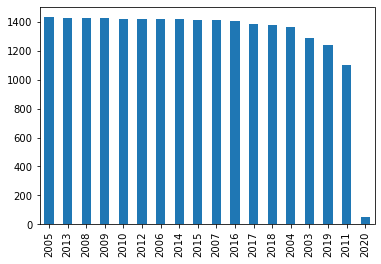

In [57]:
print(games_df['SEASON'].unique())
seasons = games_df['SEASON'].value_counts()
seasons.plot(kind="bar")

<AxesSubplot:>

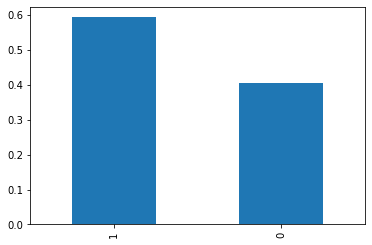

In [58]:
target = games_df['HOME_TEAM_WINS'].value_counts(normalize=True)
target.plot(kind="bar")

In [59]:
_games = games_df
step= 1000

for i in range(0,len(_games),step):
    print(i, i+step)
    formated_games=prepare_games_data(_games[i: i+step])
    formated_games.to_csv(f'../data/model_dataset/extended_games_formated_{i}.csv', index=False)

0 1000
1000 2000
2000 3000
3000 4000
4000 5000
5000 6000
6000 7000
7000 8000
8000 9000
9000 10000
10000 11000
11000 12000
12000 13000
13000 14000
14000 15000
15000 16000
16000 17000
17000 18000
18000 19000
19000 20000
20000 21000
21000 22000
22000 23000
23000 24000


In [60]:
data_frames = []
total=0
for i in range(0,len(_games),step):
    df = pd.read_csv(f'../data/model_dataset/extended_games_formated_{i}.csv') 
    data_frames.append(df)
    total+=len(df)
    print(i, len(df), total )

result  = pd.concat(data_frames)
print(len(result))

0 955 955
1000 1000 1955
2000 1000 2955
3000 1000 3955
4000 1000 4955
5000 1000 5955
6000 1000 6955
7000 1000 7955
8000 1000 8955
9000 1000 9955
10000 1000 10955
11000 1000 11955
12000 1000 12955
13000 1000 13955
14000 1000 14955
15000 1000 15955
16000 1000 16955
17000 1000 17955
18000 1000 18955
19000 1000 19955
20000 1000 20955
21000 1000 21955
22000 1000 22955
23000 421 23376
23376


In [61]:
result.to_csv(f'../data/model_dataset/extended_dataset.csv', index=False)